In [48]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import sys
import numpy.linalg as linalg


In [49]:
np.set_printoptions(threshold=sys.maxsize)

nof_nodes = 100
radius = 0.25


G = nx.random_geometric_graph(nof_nodes, radius)
# position is stored as node attribute data for random_geometric_graph
pos = nx.get_node_attributes(G, "pos")

# find node near center (0.5,0.5)
dmin = 1
ncenter = 0
for n in pos:
    x, y = pos[n]
    d = (x - 0.5) ** 2 + (y - 0.5) ** 2
    if d < dmin:
        ncenter = n
        dmin = d

# color by path length from node near center
p = dict(nx.single_source_shortest_path_length(G, ncenter))

L = nx.laplacian_matrix(G)
A = nx.convert_matrix.to_numpy_array(G)
DergeeList = list(G.degree)
D = np.zeros((nof_nodes, nof_nodes))

for node in range(len(DergeeList)):
    D[node][node] = DergeeList[node][1]
Lap = D - A

options = {"node_color": "C0", "node_size": 100}





In [52]:
L_norm = nx.normalized_laplacian_matrix(G)
evals = np.linalg.eigvals(L_norm.A)

eigenValues, eigenVectors = linalg.eigL(L_norm.A)

idx = eigenValues.argsort()[::-1]   
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]



AttributeError: module 'numpy.linalg' has no attribute 'eigL'

In [37]:
print("Adjacent matrix: \n")
print (A)
print("Degree matrix: \n")
print (D)
print("Laplacina matrix: \n")
print (Lap)
print ("Eigen values: \n")
print (evals)

0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  9.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  -1.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 

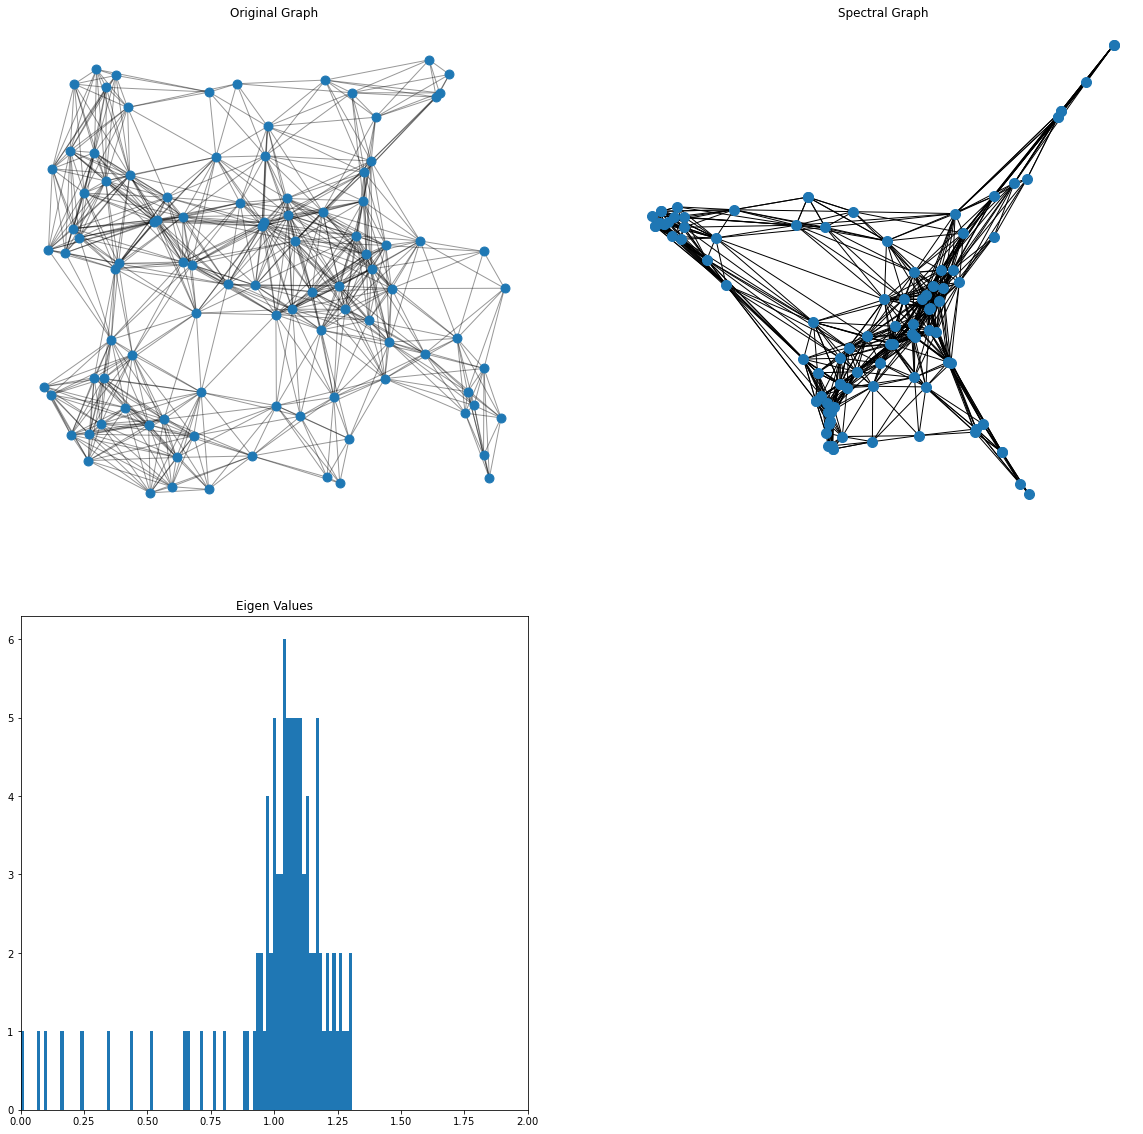

In [51]:
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.title("Original Graph")
nx.draw_networkx_edges(G, pos, nodelist=[ncenter], alpha=0.4)
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=list(p.keys()),
    node_size=80,
    # node_color=list(p.values()),
    cmap=plt.cm.Reds_r,
)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis("off")
plt.subplot(222)
plt.title("Spectral Graph")
nx.draw_spectral(G,**options)
plt.subplot(223)
plt.title("Eigen Values")
plt.hist(evals, bins=100)  # histogram with 100 bins
plt.xlim(0, 2)  # eigenvalues between 0 and 2
plt.show()